In [1]:
#standard ds libraries
import pandas as pd
import numpy as np

# my acquire and prepare file
import acquire
import prepare
import env


# import splitting functions
from sklearn.model_selection import train_test_split

#plotting
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Data Acquisition Exercises

### 4. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [2]:
from pydataset import data

In [3]:
df_iris = data('iris')
df_iris.info()
data('iris', show_doc=True) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB
iris

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Edgar Anderson's Iris Data

### Description

This famous (Fisher's or Anderson's) iris data set gives the measurements in
centimeters of the variables sepal length and width and petal length and
width, respectively, for 50 flowers from each of 3 species of iris. The
species are _Iris setosa_, _versicolor_, and _virginica_.

### Usage

    iris
    iris3

### Format

`iris` is a data frame with 150 cases (rows) and 5 variables (columns) named

In [4]:
# print the first 3 rows
print(df_iris.head(3))

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
1           5.1          3.5           1.4          0.2  setosa
2           4.9          3.0           1.4          0.2  setosa
3           4.7          3.2           1.3          0.2  setosa


In [5]:
# print the number of rows and columns (shape)
print(df_iris.shape)

(150, 5)


In [6]:
# print the column names
print(df_iris.columns)
# or df_iris.columns.to_list()

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')


In [7]:
# print the data type of each column
print(df_iris.dtypes)

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object


In [8]:
# print the summary statistics for each of the numeric variables
print(df_iris.describe().T) #.T transposes it for better readability

              count      mean       std  min  25%   50%  75%  max
Sepal.Length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
Sepal.Width   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
Petal.Length  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
Petal.Width   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5


### # 5. Read the data from this google sheet into a dataframe, df_google.

In [9]:
# Read the data from this google sheet into a dataframe, df_google.

sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)
df_google.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
#Print the first 3 rows
print(df_google.head(3))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  


In [12]:
# print the number of rows and columns
print(df_google.shape)

(891, 12)


In [13]:
# print the column names
print(df_google.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [14]:
# print the data type of each column
print(df_google.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [15]:
# print the summary statistics for each of the numeric variables
print(df_google.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [16]:
# print the unique values for each of your categorical variables
df_google.Ticket.value_counts(dropna=False)
df_google.Name.value_counts(dropna=False)
df_google.Sex.value_counts(dropna=False)
df_google.Cabin.value_counts(dropna=False)
df_google.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

### 6. Download the previous exercise's file into an excel (File → Download → Microsoft Excel). Read the downloaded file into a dataframe named df_excel.

In [17]:
df_excel = pd.read_excel("train.xlsx", sheet_name='train')
print(df_excel.head())

   PassengerId  Survived  Pclass  \
0          1.0       0.0     3.0   
1          2.0       1.0     1.0   
2          3.0       1.0     3.0   
3          4.0       1.0     1.0   
4          5.0       0.0     3.0   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0    1.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0    1.0   
2                               Heikkinen, Miss. Laina  female  26.0    0.0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0    1.0   
4                             Allen, Mr. William Henry    male  35.0    0.0   

   Parch            Ticket     Fare Cabin Embarked  
0    0.0         A/5 21171   7.2500   NaN        S  
1    0.0          PC 17599  71.2833   C85        C  
2    0.0  STON/O2. 3101282   7.9250   NaN        S  
3    0.0          113803.0  53.1000  C123        S  
4    0.0          373450.0   8.0500   NaN  

In [18]:
# assign the first 100 rows to a new dataframe, df_excel_sample
df_excel_sample = df_excel.head(100)
print(df_excel_sample.head())

   PassengerId  Survived  Pclass  \
0          1.0       0.0     3.0   
1          2.0       1.0     1.0   
2          3.0       1.0     3.0   
3          4.0       1.0     1.0   
4          5.0       0.0     3.0   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0    1.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0    1.0   
2                               Heikkinen, Miss. Laina  female  26.0    0.0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0    1.0   
4                             Allen, Mr. William Henry    male  35.0    0.0   

   Parch            Ticket     Fare Cabin Embarked  
0    0.0         A/5 21171   7.2500   NaN        S  
1    0.0          PC 17599  71.2833   C85        C  
2    0.0  STON/O2. 3101282   7.9250   NaN        S  
3    0.0          113803.0  53.1000  C123        S  
4    0.0          373450.0   8.0500   NaN  

In [19]:
# print the number of rows of your original dataframe
print(len(df_excel)) #or df_excel.shape[0]

891


In [20]:
# print the first 5 column names
df_excel.columns[:5]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex'], dtype='object')

In [21]:
# print the column names that have a data type of object
object_columns = df_excel.select_dtypes(include=['object']).head()
object_columns

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803.0,C123,S
4,"Allen, Mr. William Henry",male,373450.0,NaN,S


In [22]:
# compute the range for each of the numeric variables.
titanic_stats = df_excel[['Age', 'Fare']].describe().T
titanic_stats['range'] = titanic_stats['max'] -titanic_stats['min']
titanic_stats

,count,mean,std,min,25%,50%,75%,max,range
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000,79.5800
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292,512.3292


## Make a new python module, acquire.py to hold the following data aquisition functions:

In [23]:
# Make a function named get_titanic_data that returns the titanic data from the codeup
# data science database as a pandas data frame. Obtain your data from the Codeup Data Science Database.

import env

def get_titanic_data():
    filename = "titanic.csv"
    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        url = env.get_db_url('titanic_db')
        df = pd.read_sql('SELECT * FROM passengers', url)
        df.to_csv("titanic.csv", index=False)
        return df

In [24]:
# Make a function named get_iris_data that returns the data from the iris_db on the codeup
# data science database as a pandas data frame. The returned data frame should include the 
# actual name of the species in addition to the species_ids. Obtain your data from the Codeup Data Science Database.

#url = f'mysql+pymysql://{user}:{password}@{host}/iris_db'

def get_iris_data():
    filename = "iris.csv"
    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        url = env.get_db_url('iris_db')
        df = pd.read_sql('SELECT * FROM measurements JOIN iris_db.species USING(species_id)', url)
        df.to_csv("iris.csv", index=False)
        return df

In [25]:
# Make a function named get_telco_data that returns the data from the telco_churn database in SQL. 
# In your SQL, be sure to join contract_types, internet_service_types, payment_types tables with 
# the customers table, so that the resulting dataframe contains all the contract, payment, 
# and internet service options. Obtain your data from the Codeup Data Science Database.

def get_telco_data():
    filename = "telco.csv"
    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        url =  env.get_db_url('telco_churn')
        df = pd.read_sql('SELECT * FROM customers\
        JOIN telco_churn.contract_types USING(contract_type_id)\
        JOIN telco_churn.internet_service_types USING(internet_service_type_id)\
        JOIN telco_churn.payment_types USING(payment_type_id)', url)
        df.to_csv("telco.csv", index=False)
        return df

#### Once you've got your get_titanic_data, get_iris_data, and get_telco_data functions written, now it's time to add caching to them. To do this, edit the beginning of the function to check for the local filename of telco.csv, titanic.csv, or iris.csv. If they exist, use the .csv file. If the file doesn't exist, then produce the SQL and pandas necessary to create a dataframe, then write the dataframe to a .csv file with the appropriate name.

In [26]:
#Caching is built into the above functions, completed acquire files are in acquire.py

# Data Preparation Exercises

The end product of this exercise should be the specified functions in a python script named prepare.py. Do these in your classification_exercises.ipynb first, then transfer to the prepare.py file.

This work should all be saved in your local classification-exercises repo. Then add, commit, and push your changes.

## Using the Iris Data

In [27]:
# 1. Use the function defined in acquire.py to load the iris data.
iris_df = acquire.get_iris_data()

In [28]:
iris_df.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [29]:
# 2. Drop the species_id and measurement_id columns.
iris_df.shape

(150, 7)

In [30]:
columns_to_drop = ['species_id', 'measurement_id']
iris_df = iris_df.drop(columns = columns_to_drop)

In [31]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [32]:
# 3. Rename the species_name column to just species.
iris_df = iris_df.rename(columns={'species_name': 'species'})
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [33]:
# 4. Create dummy variables of the species name and concatenate onto the iris dataframe. 
# (This is for practice, we don't always have to encode the target, but if we used species 
# as a feature, we would need to encode it).
# Using drop_first leaves sex_male, embark_town_Queenstown, and embark_town_Southampton.

dummy_df = pd.get_dummies(iris_df[['species']], dummy_na=False, drop_first=True)
dummy_df.head()

,species_versicolor,species_virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [34]:
iris_df = pd.concat([iris_df, dummy_df], axis=1)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


In [35]:
# 5 Create a function named prep_iris that accepts the untransformed iris data, and returns the data
# with the transformations above applied.
def prep_iris(df):
    # Drop duplicates
    df.drop_duplicates(inplace=True)
    #rename column
    df = df.rename(columns={'species_name': 'species'})
    # Drop columns 
    columns_to_drop = ['species_id', 'measurement_id']
    df = df.drop(columns = columns_to_drop)
    # encoded categorical variables
    dummy_df = pd.get_dummies(df[['species']], dummy_na=False, drop_first=True)
    df = pd.concat([df, dummy_df], axis=1)
    return df

In [36]:
df.head()

NameError: name 'df' is not defined

In [ ]:
df = acquire.get_iris_data()
prep_iris(df)

## Using the Titanic dataset

In [37]:
#1 Use the function defined in acquire.py to load the Titanic data.
titanic_df = acquire.get_titanic_data()
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [38]:
# 2. Drop any unnecessary, unhelpful, or duplicated columns.
titanic_df.shape

(891, 13)

In [39]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [40]:
titanic_df.pclass.value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [41]:
columns_to_drop = ['embarked', 'pclass', 'passenger_id', 'deck']
titanic_df = titanic_df.drop(columns = columns_to_drop) 
titanic_df.head()

,survived,sex,age,sibsp,parch,fare,class,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,Southampton,0
1,1,female,38.0,1,0,71.2833,First,Cherbourg,0
2,1,female,26.0,0,0,7.9250,Third,Southampton,1
3,1,female,35.0,1,0,53.1000,First,Southampton,0
4,0,male,35.0,0,0,8.0500,Third,Southampton,1


In [42]:
# Encode the categorical columns. Create dummy variables of the categorical columns and 
# concatenate them onto the dataframe.
dummy_df = pd.get_dummies(titanic_df[['sex', 'class', 'embark_town']], dummy_na=False, drop_first=[True, True])
dummy_df.head()

,sex_male,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton
0,1,0,1,0,1
1,0,0,0,0,0
2,0,0,1,0,1
3,0,0,0,0,1
4,1,0,1,0,1


In [43]:
# Concatenate my dummy_df to my data
titanic_df = pd.concat([titanic_df, dummy_df], axis=1)
titanic_df

,survived,sex,age,sibsp,parch,fare,class,embark_town,alone,sex_male,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton
0,0,male,22.0,1,0,7.2500,Third,Southampton,0,1,0,1,0,1
1,1,female,38.0,1,0,71.2833,First,Cherbourg,0,0,0,0,0,0
2,1,female,26.0,0,0,7.9250,Third,Southampton,1,0,0,1,0,1
3,1,female,35.0,1,0,53.1000,First,Southampton,0,0,0,0,0,1
4,0,male,35.0,0,0,8.0500,Third,Southampton,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,male,27.0,0,0,13.0000,Second,Southampton,1,1,1,0,0,1
887,1,female,19.0,0,0,30.0000,First,Southampton,1,0,0,0,0,1
888,0,female,NaN,1,2,23.4500,Third,Southampton,0,0,0,1,0,1
889,1,male,26.0,0,0,30.0000,First,Cherbourg,1,1,0,0,0,0


In [44]:
# 4. Create a function named prep_titanic that accepts the raw titanic data, and returns the data
# with the transformations above applied.
def prep_titanic(df):
    df = df[(df.age.notna())]
    df = df.drop(columns=['deck', 'passenger_id', 'class', 'embarked'])

    dummy_df = pd.get_dummies(df[['sex', 'embark_town']], prefix=['sex', 'embark'])

    df = pd.concat([df, dummy_df.drop(columns=['sex_male'])], axis=1)

    df = df.drop(columns=['sex', 'embark_town']) 

    df = df.rename(columns={"sex_female": "is_female"})

    return df

In [45]:
df = acquire.get_titanic_data()
clean_titanic = prepare.prep_titanic(df)
clean_titanic.head()

,survived,pclass,age,sibsp,parch,fare,embark_town,alone,is_female,embark_Cherbourg,embark_Queenstown,embark_Southampton
0,0,3,22.0,1,0,7.2500,Southampton,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,Cherbourg,0,1,1,0,0
2,1,3,26.0,0,0,7.9250,Southampton,1,1,0,0,1
3,1,1,35.0,1,0,53.1000,Southampton,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,Southampton,1,0,0,0,1


## Using the Telco dataset

In [46]:
#1 Use the function defined in acquire.py to load the Telco data.
telco_df = acquire.get_telco_data()
telco_df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [47]:
# 2. Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns
# but keeping the corresponding string values, for example.
telco_df.info()
telco_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

(7043, 24)

In [48]:
#dropping duplicates, None here
telco_df = telco_df.drop_duplicates()
telco_df.shape

(7043, 24)

In [49]:
#dropping unneccessary columns
columns_to_drop = ['payment_type_id', 'internet_service_type_id', 'contract_type_id']
telco_df = telco_df.drop(columns = columns_to_drop)

In [50]:
telco_df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [51]:
# 3 Encode the categorical columns. Create dummy variables of the categorical columns and concatenate
# them onto the dataframe.
# Creating a list of our numeric columns
numcols = [col for col in telco_df.columns if telco_df[col].dtype != 'O']
numcols

['senior_citizen', 'tenure', 'monthly_charges']

In [52]:
# Creating a list of our categorical columns
catcols = [col for col in telco_df.columns if telco_df[col].dtype == 'O']
catcols

['customer_id',
 'gender',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

In [53]:
dummy_df = pd.get_dummies(telco_df[[
 'gender',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']], dummy_na=False, drop_first=[True, True])

In [54]:
dummy_df.head()

,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,1,1,1,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
1,1,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,1,0
3,1,1,0,1,0,0,0,0,0,1,...,1,1,1,0,0,1,0,0,1,0
4,0,1,0,1,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1


In [55]:
# 4. Create a function named prep_telco that accepts the raw telco data, and returns the data with the
# transformations above applied.
def prep_telco(df):
    # Drop duplicates
    df.drop_duplicates(inplace=True)
    # Drop columns 
    columns_to_drop = ['payment_type_id', 'internet_service_type_id', 'contract_type_id']
    df = df.drop(columns = columns_to_drop)
    # encoded categorical variables
    dummy_df = pd.get_dummies(df[['gender','partner','dependents','phone_service', 'multiple_lines','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies','paperless_billing','churn','contract_type','internet_service_type','payment_type']], dummy_na=False, drop_first=[True, True])
    df = pd.concat([df, dummy_df], axis=1)
    return df

In [56]:
df = acquire.get_telco_data()

In [57]:
df = prep_telco(df)

In [58]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,0,1,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,1,0,0,0,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,0,1,1,0,0,1,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,1,1,1,0,0,1,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,0,1,1,0,0,1,0,0,0,1


## Split your data

In [59]:
import prepare

In [60]:
#1 Write a function to split your data into train, test and validate datasets. Add this function to prepare.py.

In [61]:
# 20% test, 80% train_validate
# then of the 80% train_validate: 30% validate, 70% train. 

train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df.churn)
train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.churn)

### 2. Run the function in your notebook on the Iris dataset, returning 3 datasets, train_iris, validate_iris and test_iris.

In [62]:
#Acquire iris data
df = acquire.get_iris_data()

In [63]:
#Prep iris data
df = prepare.prep_iris(df)

In [64]:
#Set target variable
target = 'species'

In [65]:
#Train test split
#from prepare import my_train_test_split
train_iris, validate_iris, test_iris = prepare.my_train_test_split(df, target)

In [66]:
#Check training datasets
train_iris.shape
test_iris.shape
validate_iris.shape

(23, 8)

### 3. Run the function on the Titanic dataset, returning 3 datasets, train_titanic, validate_titanic and test_titanic.

In [67]:
#Acquire titanic data
df = acquire.get_titanic_data()

In [68]:
#Prep titanic data
df = prepare.prep_titanic(df)

In [69]:
#Set target variable
target = 'survived'

In [70]:
#Train test split
#from prepare import my_train_test_split
train_titanic, validate_titanic, test_titanic = prepare.my_train_test_split(df, target)

In [71]:
#Check training datasets
train_titanic.shape
test_titanic.shape
validate_titanic.shape

(107, 12)

### 4. Run the function on the Telco dataset, returning 3 datasets, train_telco, validate_telco and test_telco.

In [72]:
#Acquire telco data
df = acquire.get_telco_data()

In [73]:
#Prep telco data
df = prepare.prep_telco(df)

In [74]:
target = 'churn'

In [75]:
#Train test split
train_telco, validate_telco, test_telco = prepare.my_train_test_split(df, target)

In [76]:
train_telco.shape

(4929, 47)

In [77]:
validate_telco.shape

(1057, 47)

In [78]:
test_telco.shape

(1057, 47)

# Explore Lesson Exercises

In [79]:
#Imports
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

### 1. Acquire, prepare & split your data.

In [80]:
iris_df = acquire.get_iris_data()
iris_df.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [81]:
#Prepare iris data
iris_df = prepare.prep_iris(iris_df)

In [82]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0


In [83]:
#Split iris data
#Set target variable
target = 'species'
train_iris, validate_iris, test_iris = prepare.my_train_test_split(iris_df, target)

### 2. Univariate Stats

In [84]:
##For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive
##statistics (using .describe()).
train_iris.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica
count,104.000000,104.000000,104.000000,104.000000,104,104.000000,104.000000,104.000000
unique,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,setosa,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,35,NaN,NaN,NaN
mean,5.836538,3.064423,3.768269,1.207692,NaN,0.336538,0.326923,0.336538
std,0.814082,0.421029,1.759648,0.776811,NaN,0.474814,0.471361,0.474814
min,4.300000,2.000000,1.000000,0.100000,NaN,0.000000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,NaN,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,NaN,0.000000,0.000000,0.000000
75%,6.400000,3.400000,5.100000,1.800000,NaN,1.000000,1.000000,1.000000


In [85]:
train_iris.dtypes

sepal_length          float64
sepal_width           float64
petal_length          float64
petal_width           float64
species                object
species_setosa          uint8
species_versicolor      uint8
species_virginica       uint8
dtype: object

In [86]:
num_vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
cat_vars = ['species', 'species_versicolor', 'species_virginica']

species
setosa        35
virginica     35
versicolor    34
Name: species, dtype: int64
setosa        33.653846
virginica     33.653846
versicolor    32.692308
Name: species, dtype: float64


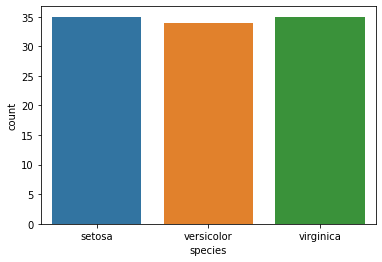

species_versicolor
0    70
1    34
Name: species_versicolor, dtype: int64
0    67.307692
1    32.692308
Name: species_versicolor, dtype: float64


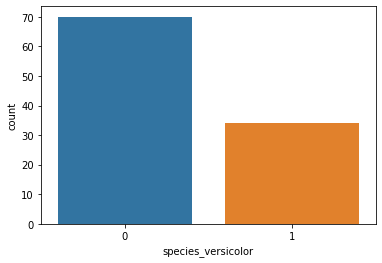

species_virginica
0    69
1    35
Name: species_virginica, dtype: int64
0    66.346154
1    33.653846
Name: species_virginica, dtype: float64


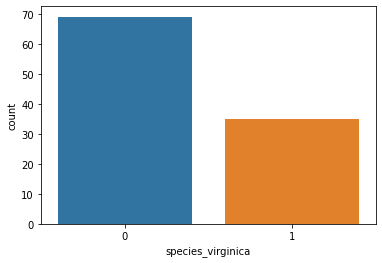

In [87]:
# For each species (categorical variable): create a frequency table and a bar plot of those frequencies.
for col in cat_vars:
    print(col)
    print(train_iris[col].value_counts())
    print(train_iris[col].value_counts(normalize=True)*100)
    sns.countplot(x=col, data=train_iris)
    plt.show()

### For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

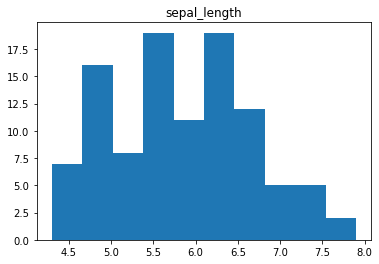

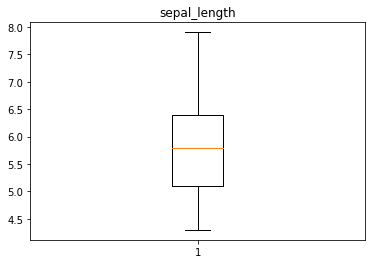

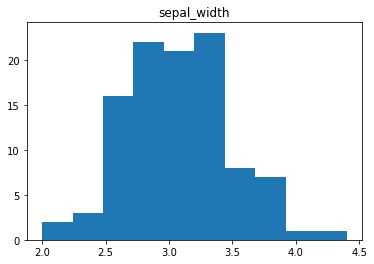

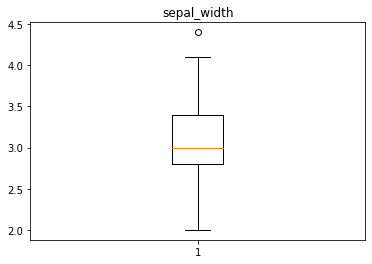

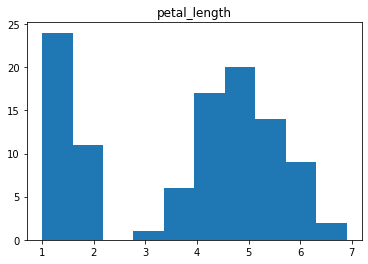

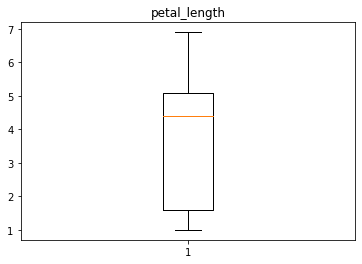

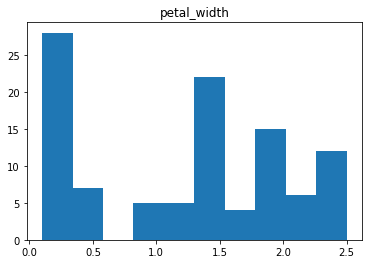

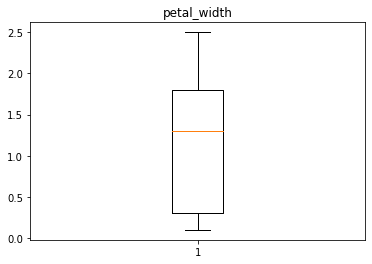

In [88]:
# Plot numeric columns
for col in num_vars:
    plt.hist(train_iris[col])
    plt.title(col)
    plt.show()
    plt.boxplot(train_iris[col])
    plt.title(col)
    plt.show()

In [89]:
#describe
train_iris.sepal_length.describe()
train_iris.sepal_width.describe()
train_iris.petal_length.describe()  #petal length appears skewed left, #boxplot shows very wide distribution between 1st and 3rd quartile, skewed left
train_iris.petal_width.describe()  #petal_width appears skewed left

count    104.000000
mean       1.207692
std        0.776811
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal_width, dtype: float64

### Document takeaways & any actions.

### Sepal length and width appear to have more normal distributions for the train data set. Petal length and petal width appear to be clustered in different areas, which could be explored further in species analysis

## 3. Bivariate Stats

#### Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

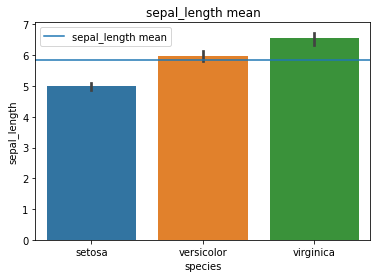

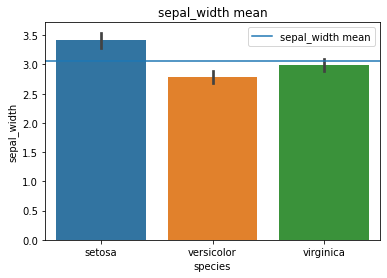

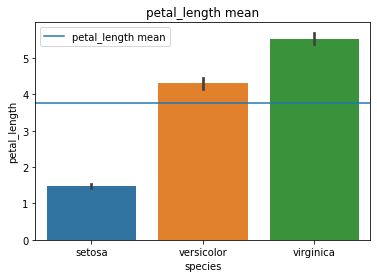

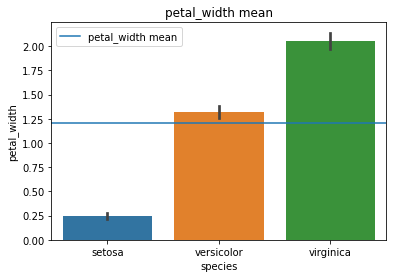

In [90]:
for col in num_vars:
    plt.title(f'{col} mean')
    sns.barplot(x='species', y = col, data = train_iris)
    pop_species_rate = train_iris[col].mean()
    plt.axhline(pop_species_rate, label = f'{col} mean')
    plt.legend()
    plt.show()

### For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.
1. State the hypotheses. 

H0: Virginica petal length are on average lower or equal to Versicolor petals

Ha: Virginica petals on average are significantly larger than Versicolor petals

In [91]:
# Choose significance level
alpha = 0.05

In [92]:
virginica = train_iris[train_iris.species == 'virginica']
virginica = virginica.petal_width
virginica

115    2.3
111    1.9
128    2.1
139    2.1
116    1.8
148    2.3
109    2.5
103    1.8
114    2.4
132    2.2
130    1.9
124    2.1
123    1.8
141    2.3
107    1.8
120    2.3
104    2.2
140    2.4
142    1.9
106    1.7
126    1.8
129    1.6
145    2.3
149    1.8
125    1.8
108    1.8
136    2.4
133    1.5
118    2.3
143    2.3
112    2.1
131    2.0
100    2.5
121    2.0
113    2.0
Name: petal_width, dtype: float64

In [93]:
versicolor = train_iris[train_iris.species == 'versicolor']
versicolor = versicolor.petal_width
versicolor

62    1.0
75    1.4
96    1.3
92    1.2
60    1.0
54    1.5
55    1.3
97    1.3
87    1.3
52    1.5
59    1.4
71    1.3
58    1.3
64    1.3
72    1.5
67    1.0
83    1.6
69    1.1
84    1.5
51    1.5
50    1.4
82    1.2
88    1.3
78    1.5
57    1.0
99    1.3
70    1.8
76    1.4
79    1.0
73    1.2
63    1.4
90    1.2
91    1.4
85    1.6
Name: petal_width, dtype: float64

In [94]:
#perform the Mann-Whitney U test
stats.mannwhitneyu(virginica, versicolor, alternative='two-sided')

MannwhitneyuResult(statistic=1177.0, pvalue=2.4185402575072122e-12)

In [95]:
#Establish variables for species

#Virginica
virginica = train_iris[train_iris.species == 'virginica']
# again, for versicolor
versicolor = train_iris[train_iris.species == 'versicolor']
# again, for setosa
setosa = train_iris[train_iris.species == 'setosa']

In [96]:
# establish a one-tailed test using a kwarg in mannwhitney
t, p = stats.mannwhitneyu(virginica.petal_width, versicolor.petal_width, 
                          alternative="greater")
t, p

(1177.0, 1.2092701287536061e-12)

In [97]:
test_var = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for var in test_var:
    t, p = t, p = stats.mannwhitneyu(virginica[var], versicolor[var], alternative="greater")
    print(f'Comparing {var} between virginica and versicolor')
    print(t, p)
    print('------------------')
    print('\n')

Comparing sepal_length between virginica and versicolor
928.0 3.1999513402311464e-05
------------------


Comparing sepal_width between virginica and versicolor
789.0 0.009668405603427896
------------------


Comparing petal_length between virginica and versicolor
1165.0 3.848923124556974e-12
------------------


Comparing petal_width between virginica and versicolor
1177.0 1.2092701287536061e-12
------------------




## Document takeaways & any actions: 
- Virginica sepal length, sepal width, petal length, and petal width mean are significantly larger than versicolors in four listed variable values

## Multivariate stats

In [98]:
#Creating column for sepal area and petal area

train_iris['sepal_area'] = train_iris.sepal_length * train_iris.sepal_width
train_iris['petal_area'] = train_iris.petal_length * train_iris.petal_width

### Visualize the interaction of each measurement type with the others using a pairplot(or scatter matrix or something similar) and add color to represent species. Sepal Length vs width

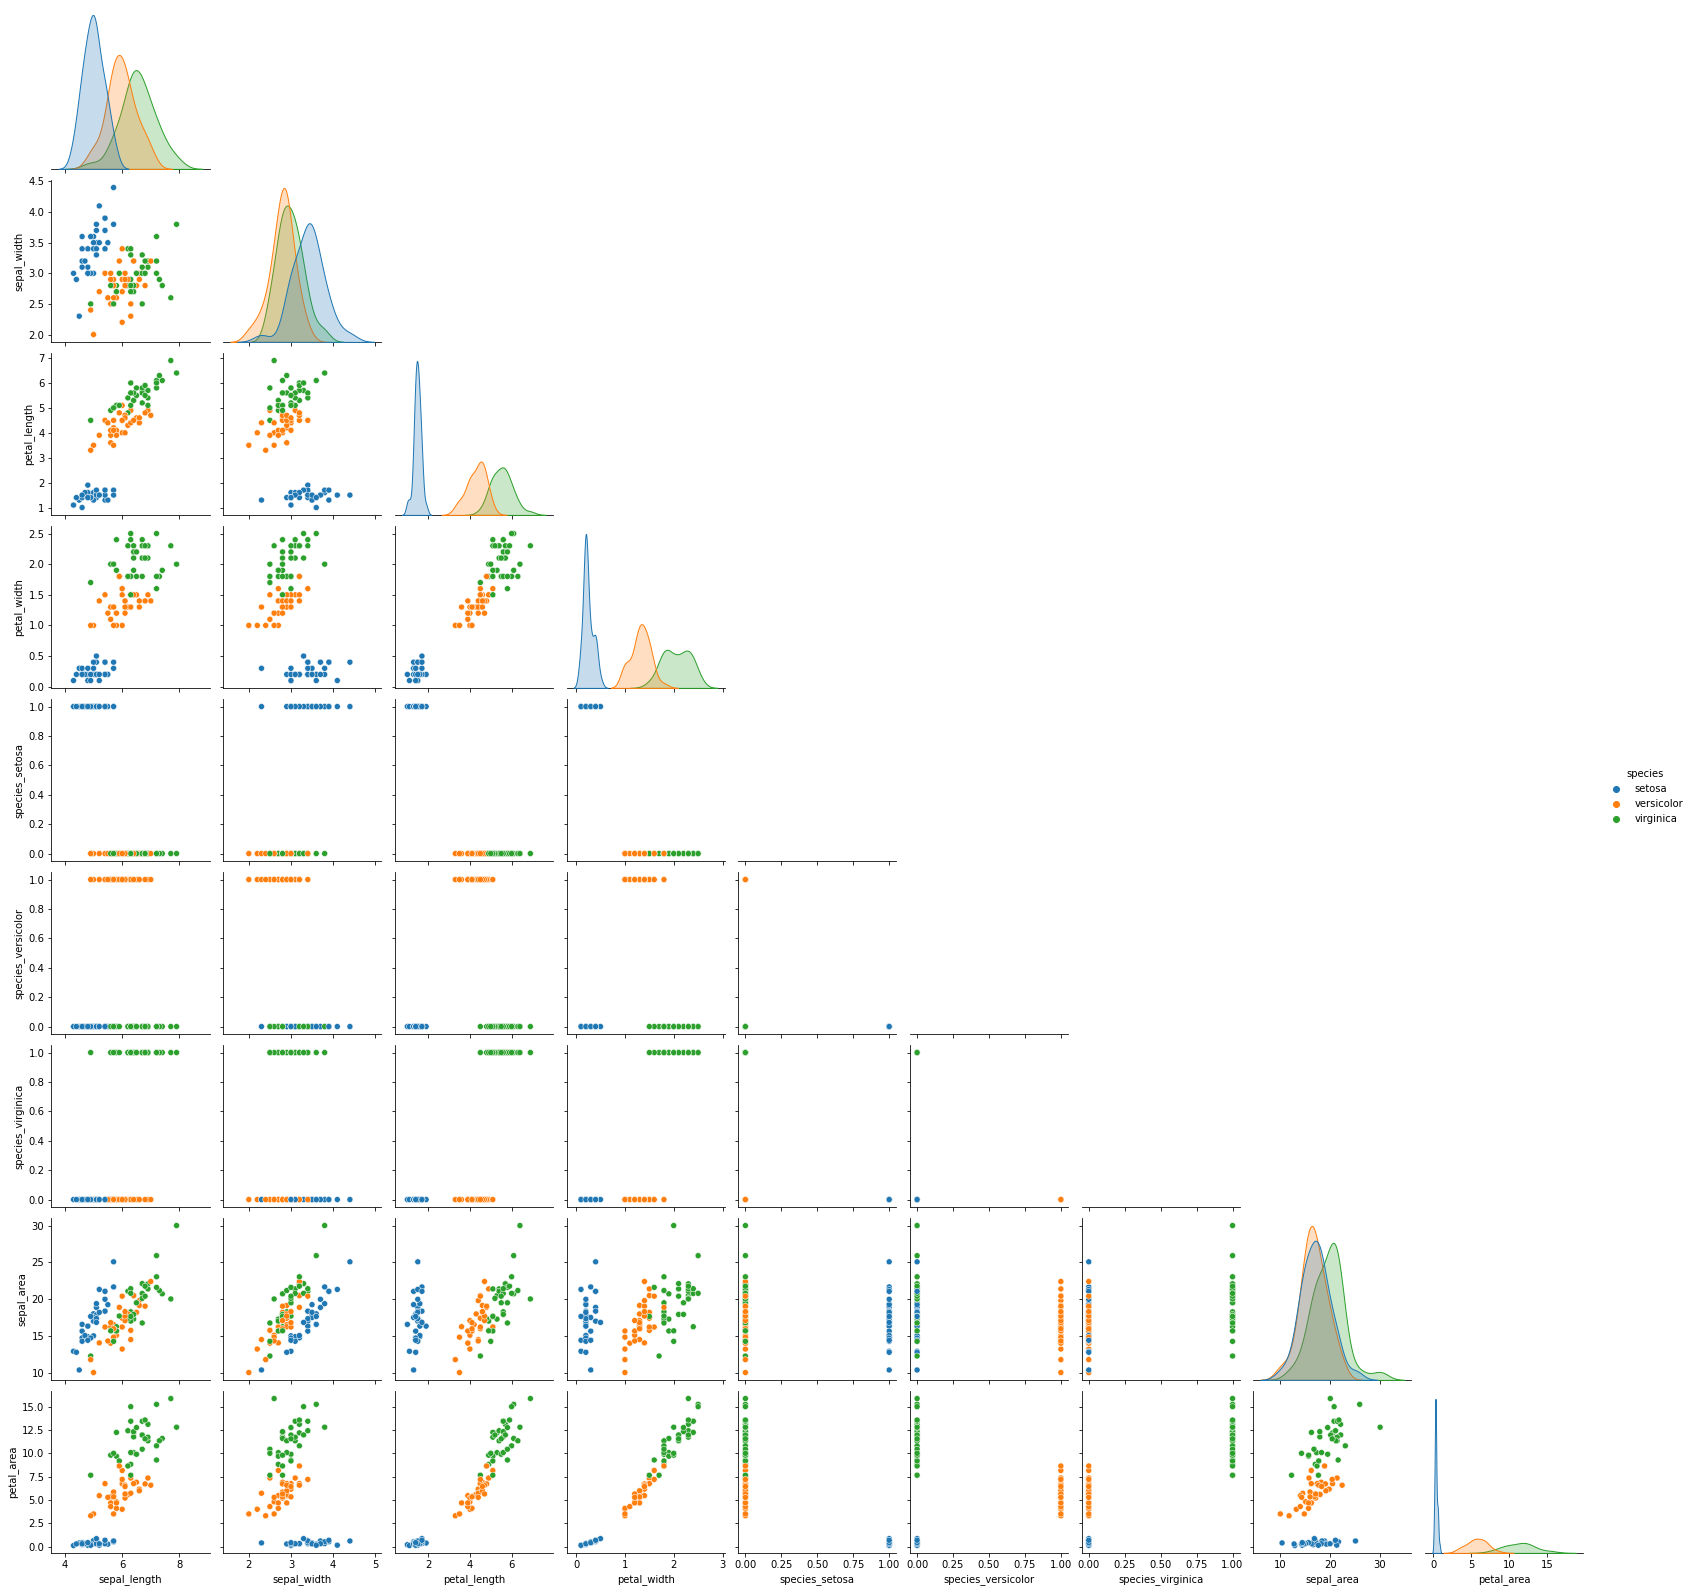

In [99]:
sns.pairplot(train_iris, hue='species', corner=True)
plt.show()

### Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

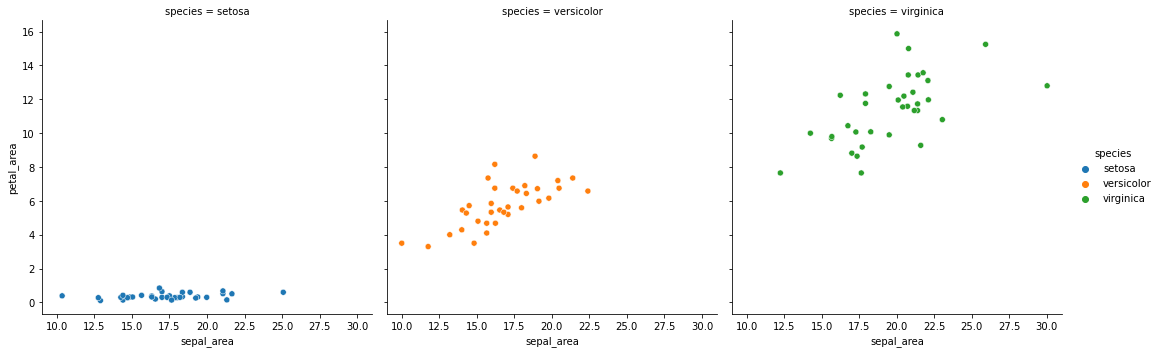

In [100]:
sns.relplot(data=train_iris, x='sepal_area', y='petal_area', kind='scatter', hue='species', col='species')

### Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

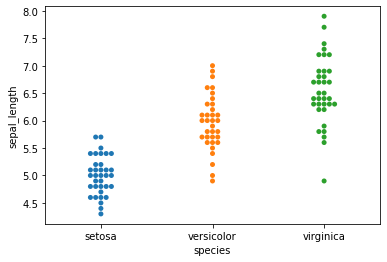

In [101]:
sns.swarmplot(data=train_iris, x='species', y='sepal_length')

In [102]:
#melting df to visualize together
train_melt = train_iris.melt(id_vars = 'species')
train_melt 

,species,variable,value
0,setosa,sepal_length,5.10
1,versicolor,sepal_length,6.00
2,virginica,sepal_length,6.40
3,setosa,sepal_length,5.00
4,virginica,sepal_length,6.40
...,...,...,...
931,virginica,petal_area,9.80
932,setosa,petal_area,0.42
933,setosa,petal_area,0.68
934,versicolor,petal_area,7.20


/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 83.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 68.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 81.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categori

<AxesSubplot:xlabel='variable', ylabel='value'>

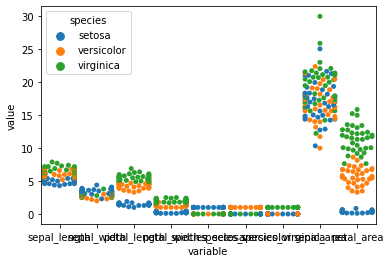

In [103]:
sns.swarmplot(data=train_melt, x='variable', y='value', hue='species')

### Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

In [104]:
# Is the sepal area signficantly different in virginica compared to setosa?

In [105]:
virginica = train_iris[train_iris['species'] == 'virginica']
versicolor = train_iris[train_iris['species'] == 'versicolor']
setosa = train_iris[train_iris['species'] == 'setosa']

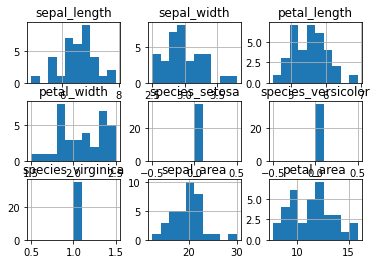

In [106]:
virginica.hist()
plt.show()

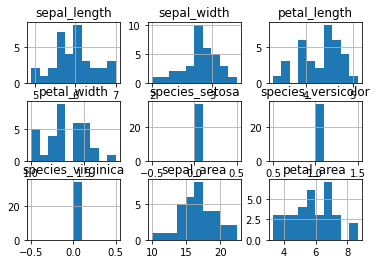

In [107]:
versicolor.hist()
plt.show()

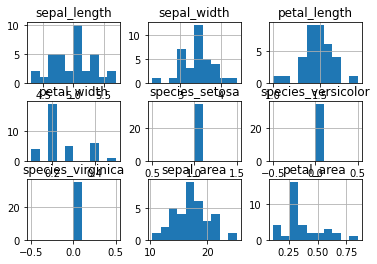

In [108]:
setosa.hist()
plt.show()

In [109]:
virginica.sepal_area.mean()

19.633999999999997

In [110]:
setosa.sepal_area.mean()

17.14257142857143

In [111]:
#Hypotheses
# H^0: The mean sepal area of virginica species is less than or equal to the mean area of setosa species
# H^a: The mean sepal area of virginica species is higher than the mean sepal area of setosa species

In [112]:
#perform the Mann-Whitney U test because sample size is too small for a t-test:
alpha = 0.05
stats.mannwhitneyu(virginica.sepal_area, setosa.sepal_area, alternative="greater")

MannwhitneyuResult(statistic=889.0, pvalue=0.0005931612610061113)

In [113]:
#Conclusion
#We can reject the null hypothesis, the mean sepal area of virginica species is higher than setosa species

## Part II Explore your titanic dataset more completely.

### 1. Acquire, prepare & split your data.

In [128]:
### Acquire
titanic_df = acquire.get_titanic_data()
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [129]:
#Prepare titanic data
titanic_df = prepare.prep_titanic(titanic_df)
titanic_df.head()

,survived,pclass,age,sibsp,parch,fare,embark_town,alone,is_female,embark_Cherbourg,embark_Queenstown,embark_Southampton
0,0,3,22.0,1,0,7.2500,Southampton,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,Cherbourg,0,1,1,0,0
2,1,3,26.0,0,0,7.9250,Southampton,1,1,0,0,1
3,1,1,35.0,1,0,53.1000,Southampton,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,Southampton,1,0,0,0,1


In [130]:
#Split titanic data
#Set target variable
target = 'survived'
train_titanic, validate_titanic, test_titanic = prepare.my_train_test_split(titanic_df, target)

In [131]:
train_titanic.shape
validate_titanic.shape
test_titanic.shape

(108, 12)

#### Imputing values for age and embarked town

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
# fit the thing using imputer.fit()
imputer = imputer.fit(train_titanic[['embark_town']])

In [ ]:
# Use the thing using imputer.transform()

train_titanic[['embark_town']] = imputer.transform(train_titanic[['embark_town']])

validate_titanic[['embark_town']] = imputer.transform(validate_titanic[['embark_town']])

test_titanic[['embark_town']] = imputer.transform(test_titanic[['embark_town']])

In [ ]:
# Validate that there are no longer any Null values in embark_town.
print('embark_town nulls\n')
print(f'train nulls: {train_titanic.embark_town.isnull().sum()}')
print(f'validate nulls: {validate_titanic.embark_town.isnull().sum()}')
print(f'test nulls: {test_titanic.embark_town.isnull().sum()}')

## 2. Univariate stats

In [122]:
train_titanic.describe(include='all')

,survived,pclass,age,sibsp,parch,fare,embark_town,alone,is_female,embark_Cherbourg,embark_Queenstown,embark_Southampton
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,498,499.000000,499.000000,499.000000,499.000000,499.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Southampton,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,389,NaN,NaN,NaN,NaN,NaN
mean,0.406814,2.278557,29.015711,0.539078,0.436874,34.239587,NaN,0.567134,0.362725,0.174349,0.044088,0.779559
std,0.491733,0.833872,14.573191,0.977650,0.839250,52.688391,NaN,0.495970,0.481269,0.379790,0.205497,0.414960
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,8.050000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,15.500000,NaN,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,32.410400,NaN,1.000000,1.000000,0.000000,0.000000,1.000000


In [123]:
train_titanic.dtypes

survived                int64
pclass                  int64
age                   float64
sibsp                   int64
parch                   int64
fare                  float64
embark_town            object
alone                   int64
is_female               uint8
embark_Cherbourg        uint8
embark_Queenstown       uint8
embark_Southampton      uint8
dtype: object

In [ ]:
num_vars = ['age', 'sibsp', 'parch', 'fare']
cat_vars = ['survived', 'is_female', 'pclass', 'alone']

In [ ]:
# For each species (categorical variable): create a frequency table and a bar plot of those frequencies.
for col in cat_vars:
    print(col)
    print(train_titanic[col].value_counts())
    print(train_titanic[col].value_counts(normalize=True)*100)
    sns.countplot(x=col, data=train_titanic)
    plt.show()

In [ ]:
#Examining continuous variables
for col in num_vars:
    #use matplotlib to create a histogram
    #alt formatting: calling train[col].hist()
    plt.hist(train_titanic[col])
    # make a title, cleaned up a little with string methods
    plt.title(col.replace('_',' ').capitalize())
    #call plt.show so we have separate visualizations
    plt.show()
    # use matplotlib to create a boxplot
    plt.boxplot(train_titanic[col])
    # use the same string methods to clean up the title
    plt.title(col.replace('_',' ').capitalize())
    plt.savefig(col + 'box.png')
    plt.show()

### Document takeaways & any actions.

In [ ]:
# More men than women were on board the titanic
# More individuals perished in the sinking than survived 
# More individuals in this data set were Third Class Passengers
# Most Passengers in this data set were on board alone

## Bivariate Analysis

In [ ]:
#Looking at relationship between passenger class and survival

plt.title("Passengers in First and Second Class appear more likely to have survived")
sns.barplot(x="pclass", y="survived", data=train_titanic)
population_survival_rate = train_titanic.survived.mean()
plt.axhline(population_survival_rate, label="Population survival rate")
plt.legend()
plt.show()

In [ ]:
#Looking at the relationship between traveling alone and Survival
plt.title("Those traveling alone appear less likely to have survived")
sns.barplot(x="alone", y="survived", data=train_titanic)
population_survival_rate = train_titanic.survived.mean()
plt.axhline(population_survival_rate, label="Population survival rate")
plt.legend()
plt.show()

In [ ]:
#Looking at the relationship between gender and survival
plt.title("More women than men survived the sinking")
sns.barplot(x="is_female", y="survived", data=train_titanic)
population_survival_rate = train_titanic.survived.mean()
plt.axhline(population_survival_rate, label="Population survival rate")
plt.legend()
plt.show()

### Looking at the relationship between embarkation point and survival

In [ ]:
train_titanic.embark_town.value_counts()

In [ ]:
# Looking at the relationship between embarkation point and survival
plt.title("Relationship between Embarkation Point and Survival")
sns.barplot(x="embark_town", y="survived", data=train_titanic)
population_survival_rate = train_titanic.survived.mean()
plt.axhline(population_survival_rate, label="Population survival rate")
plt.legend()
plt.show()

### Running tests to compare these possible relationships

### 1. Class vs. Survival:
Hypotheses:

H^0: The survival rate of 3rd class passengers is greater than or equal to the surival rate of 1st and 2nd class.

H^a: The survival rate of 3rd class passengers is less than the survival rate of first and second class passengers.

In [ ]:
# Chi-Square test to compare two categorical variables (Class and Survival)

alpha = 0.05
null_hypothesis = "The survival rate of 3rd class passengers is greater than or equal to the surival rate of 1st and 2nd class."
alternative_hypothesis = "The survival rate of 3rd class passengers is less than the survival rate of first and second class passengers."

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train_titanic.survived, train_titanic['pclass'])

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

####  Conclusion: There appears to be a significant relationship between class and survival

### 2. Traveling Status vs. Survival:
Hypotheses:

H^0: The survival rate of passengers traveling alone is greater than or equal to passengers not traveling alone

H^a: The survival rate of passengers traveling alone is less than the survival rate of passengers not traveling alone.

In [ ]:
# Chi-Square test to compare two categorical variables (Alone and Survival)

alpha = 0.05
null_hypothesis = "The survival rate of passengers traveling alone is greater than or equal to passengers not traveling alone."
alternative_hypothesis = "The survival rate of passengers traveling alone is less than the survival rate of passengers not traveling alone."

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train_titanic.survived, train_titanic.alone)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

####  Conclusion: There appears to be a significant relationship between traveling alone and survival (those traveling alone are less likely to survive)

### 3. Gender vs. Survival:
Hypotheses:

H^0: The survival rate of female passengers is less than or equal to the survival rate of male passengers.

H^a: The survival rate of female passengers is greater the survival rate of male passengers.

In [ ]:
# Chi-Square test to compare two categorical variables (Sex and Survival)

alpha = 0.05
null_hypothesis = "The survival rate of female passengers is less than or equal to the survival rate of male passengers."
alternative_hypothesis = "The survival rate of female passengers is greater the survival rate of male passengers."

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train_titanic.survived, train_titanic.is_female)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

####  Conclusion: There appears to be a significant relationship between gender and survival (women are more likely to survive)

### 4. Embarcation Port vs. Survival:
Hypotheses:

H^0: The survival rate of passengers embarking in Cherbourg is less than or equal to the survival rate of passengers embarking in Queenstown or Southampton.

H^a: The survival rate of passengers embarking in Cherbourg is greater than the survival rate of passengers embarking in Queenstown or Southhampton

In [ ]:
# Chi-Square test to compare two categorical variables (Embarcation Point and Survival)
alpha = 0.05
null_hypothesis = "The survival rate of passengers embarking in Cherbourg is less than or equal to the survival\
rate of passengers embarking in Queenstown or Southampton."
alternative_hypothesis = "The survival rate of passengers embarking in Cherbourg is greater than the survival\
rate of passengers embarking in Queenstown or Southhampton."

# Setup a crosstab of observed embarkation point and survival
observed = pd.crosstab(train_titanic.survived, train_titanic.embark_town)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p/2 < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

####  Conclusion: There appears to be a significant relationship between embarcation point and survival, with Cherbourg appearing to have a better survival rate, followed by Queenstown. Something to investigate is what factors are impacting this (additional hypothesis could be, does fare ($) impact this relationship (socioeconomic factors)

### 5. Fare vs. Survival:

In [ ]:
#General descriptors of fare in the data set
print(f'Mean fare: {train_titanic.fare.mean()}')
print(f'Minimum fare: {train_titanic.fare.min()}')
print(f'Maximum fare: {train_titanic.fare.max()}')

In [ ]:
#Let's Visualize this relationship
plt.title("Fare paid by passengers")
train_titanic.fare.hist()
plt.show()

In [ ]:
survived_passengers = train_titanic[train_titanic.survived == 1]
perished_passengers = train_titanic[train_titanic.survived == 0]
plt.title("Relationship between fare and survival")
plt.hist(survived_passengers.fare, label="survived")
plt.hist(perished_passengers.fare, label="perished")
plt.legend()
plt.show()

Hypotheses:

H^0: The survival rate of passengers who pay a higher fare is less than or equal to the survival rate of passengers who pay a lower fare

H^a: The survival rate of passengers who pay a higher fare is greater than or equal to the survival rate of passengers who pay a lower fare
    

### Perform a T-Test

In [ ]:
survived_passengers = train_titanic[train_titanic.survived == 1]
perished_passengers = train_titanic[train_titanic.survived == 0]

In [ ]:
#Check assumptions with sample size--looks good
len(survived_passengers)
len(perished_passengers)

In [ ]:
#check variances
print(survived_passengers.fare.var())
print(perished_passengers.fare.var())

In [ ]:
#Need to ensure variances are equal
import scipy.stats as stats
stat, pval = stats.levene(survived_passengers.fare, perished_passengers.fare)
pval
# pval under our alpha, so we cannot assume equal variances

In [ ]:
# Compute test statistic
alpha = 0.05
tstat, pval = stats.ttest_ind(survived_passengers.fare, perished_passengers.fare, equal_var=False)
tstat, pval

In [ ]:
#Conclusion
#verify significance
if (pval/2 < alpha) and (tstat > 0):
    print("we can reject the null hypothesis: Passengers who survived had a higher mean fare than passengers who perished.")
else:
    print("We fail to reject the null hypothesis")

### Bivariate analysis conclusion: There is a relationship between fare and survival, and embark point and survival. What is the relationship of both with survival?

## Multivariate Analysis

In [ ]:
train_titanic.head()

In [ ]:
sns.pairplot(train_titanic, hue='survived', corner=True)
plt.show()

In [ ]:
sns.relplot(data=train_titanic, x='age', y='fare', kind='scatter', hue='survived', col='survived')
#Outliers in age

In [ ]:
#Comparing age
sns.swarmplot(data=train_titanic, x='survived', y='age')

In [ ]:
#Comparing fare
sns.stripplot(data=train_titanic, x='survived', y='fare')
#outliers in fare

In [ ]:
#melting df to visualize together
titanic_melt = train_titanic.melt(id_vars = 'survived')
titanic_melt 

In [ ]:
sns.stripplot(data=titanic_melt, x='variable', y='value', hue='survived')

## Part III Explore your telco dataset more completely.

In [2]:
##Acquire
telco_df = acquire.get_telco_data()
telco_df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [3]:
#Prepare
telco_df = prepare.prep_telco(telco_df)
telco_df.head()

/Users/crislucin/codeup-data-science/classification-exercises/prepare.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_charges'] = df.total_charges.astype(float)
/Users/crislucin/codeup-data-science/classification-exercises/prepare.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender_encoded'] = df.gender.map({'Female': 1, 'Male': 0})
/Users/crislucin/codeup-data-science/classification-exercises/prepare.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,...,1,0,0,1,0,0,0,0,0,1
1,Male,0,No,No,9,Yes,Yes,No,No,No,...,0,0,1,0,0,0,0,0,0,1
2,Male,0,No,No,4,Yes,No,No,No,Yes,...,0,0,0,0,0,1,0,0,1,0
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,...,1,0,1,0,0,1,0,0,1,0
4,Female,1,Yes,No,3,Yes,No,No,No,No,...,1,0,0,0,0,1,0,0,0,1


In [4]:
#Split telco data
#Set target variable
target = 'churn'
train_telco, validate_telco, test_telco = prepare.train_validate_test_split(telco_df, target)

In [5]:
len(train_telco)

4922

In [6]:
train_telco.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
4407,Female,0,No,No,50,Yes,Yes,No,No,No,...,1,0,1,0,0,1,0,0,1,0
1756,Male,0,No,No,4,Yes,No,No,No,No,...,0,0,0,0,0,1,0,0,1,0
4669,Male,0,Yes,Yes,72,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,0,1,0,1,0,1,0
2379,Female,0,Yes,Yes,71,Yes,Yes,Yes,Yes,Yes,...,1,0,1,0,1,1,0,0,0,0
4118,Male,0,Yes,Yes,56,Yes,Yes,No,Yes,No,...,1,0,0,0,0,1,0,1,0,0


In [7]:
train_telco.describe(include = 'all')

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
count,4922,4922.000000,4922,4922,4922.000000,4922,4922,4922,4922,4922,...,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000
unique,2,NaN,2,2,NaN,2,3,3,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Male,NaN,No,No,NaN,Yes,No,No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2483,NaN,2502,3436,NaN,4445,2392,2437,2141,2137,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.163145,NaN,NaN,32.549573,NaN,NaN,NaN,NaN,NaN,...,0.380333,0.220033,0.390492,0.208046,0.245632,0.438643,0.220033,0.224096,0.335636,0.224502
std,NaN,0.369536,NaN,NaN,24.563833,NaN,NaN,NaN,NaN,NaN,...,0.485518,0.414310,0.487910,0.405951,0.430505,0.496271,0.414310,0.417028,0.472260,0.417296
min,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,0.000000,NaN,NaN,56.000000,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000


In [8]:
train_telco.dtypes

gender                                    object
senior_citizen                             int64
partner                                   object
dependents                                object
tenure                                     int64
phone_service                             object
multiple_lines                            object
online_security                           object
online_backup                             object
device_protection                         object
tech_support                              object
streaming_tv                              object
streaming_movies                          object
paperless_billing                         object
monthly_charges                          float64
total_charges                            float64
churn                                     object
contract_type                             object
internet_service_type                     object
payment_type                              object
gender_encoded      

In [13]:
num_vars = ['tenure', 'monthly_charges', 'total_charges']
cat_vars = ['gender','partner','dependents','phone_service','multiple_lines','online_security','online_backup','device_protection'\
            'tech_support', 'streaming_tv', 'streaming_movies','paperless_billing','contract_type','internet_service_type'\
            'payment_type']

gender
Male      2483
Female    2439
Name: gender, dtype: int64
Male      50.446973
Female    49.553027
Name: gender, dtype: float64


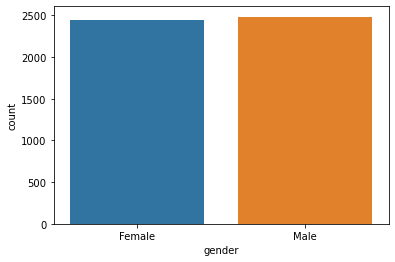

partner
No     2502
Yes    2420
Name: partner, dtype: int64
No     50.832995
Yes    49.167005
Name: partner, dtype: float64


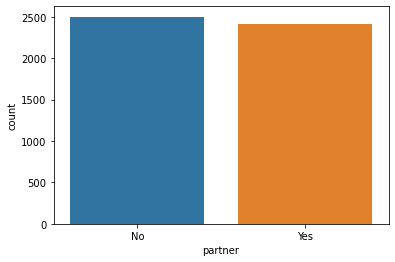

dependents
No     3436
Yes    1486
Name: dependents, dtype: int64
No     69.809021
Yes    30.190979
Name: dependents, dtype: float64


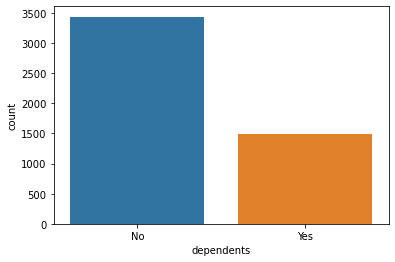

phone_service
Yes    4445
No      477
Name: phone_service, dtype: int64
Yes    90.308818
No      9.691182
Name: phone_service, dtype: float64


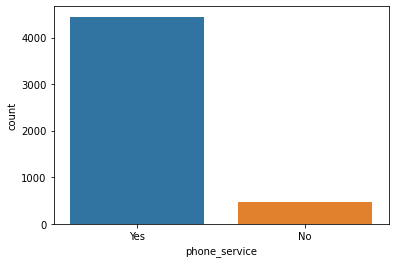

multiple_lines
No                  2392
Yes                 2053
No phone service     477
Name: multiple_lines, dtype: int64
No                  48.598131
Yes                 41.710687
No phone service     9.691182
Name: multiple_lines, dtype: float64


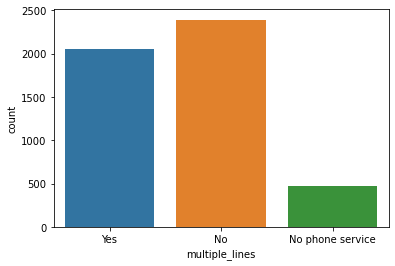

online_security
No                     2437
Yes                    1402
No internet service    1083
Name: online_security, dtype: int64
No                     49.512393
Yes                    28.484356
No internet service    22.003251
Name: online_security, dtype: float64


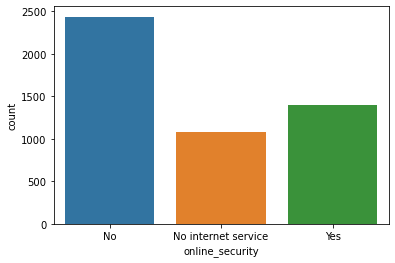

online_backup
No                     2141
Yes                    1698
No internet service    1083
Name: online_backup, dtype: int64
No                     43.498578
Yes                    34.498171
No internet service    22.003251
Name: online_backup, dtype: float64


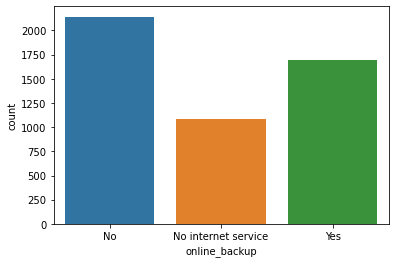

device_protectiontech_support


KeyError: 'device_protectiontech_support'

In [14]:
for col in cat_vars:
    print(col)
    print(train_telco[col].value_counts())
    print(train_telco[col].value_counts(normalize=True)*100)
    sns.countplot(x=col, data=train_telco)
    plt.show()

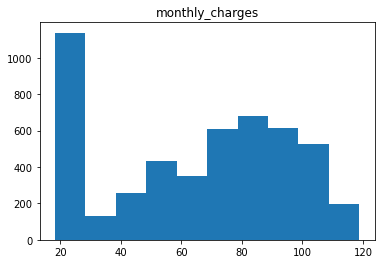

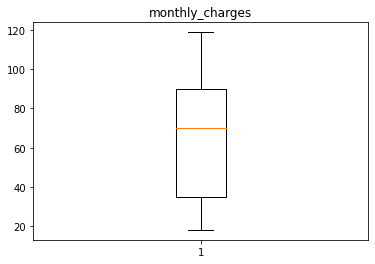

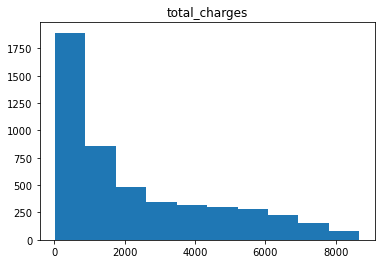

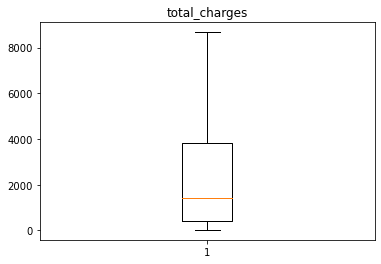

In [11]:
# Plot numeric columns
num_cols = train_telco.columns[[train_telco[col].dtype == 'float64' for col in train_telco.columns]]
for col in num_cols:
    plt.hist(train_telco[col])
    plt.title(col)
    plt.show()
    plt.boxplot(train_telco[col])
    plt.title(col)
    plt.show()

## Bivariate Analysis

In [20]:
train_telco.churn_encoded.value_counts()

0    3613
1    1309
Name: churn_encoded, dtype: int64

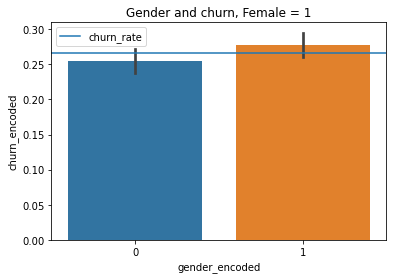

In [29]:
#Looking at relationship between gender and churn

plt.title("Gender and churn, Female = 1")
sns.barplot(x="gender_encoded", y="churn_encoded", data=train_telco)
churn_rate = train_telco.churn_encoded.mean()
plt.axhline(churn_rate, label="churn_rate")
plt.legend()
plt.show()

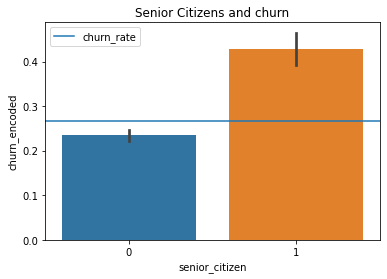

In [40]:
#Looking at relationship between senior citizens and churn

plt.title("Senior Citizens and churn")
sns.barplot(x="senior_citizen", y="churn_encoded", data=train_telco)
churn_rate = train_telco.churn_encoded.mean()
plt.axhline(churn_rate, label="churn_rate")
plt.legend()
plt.show()

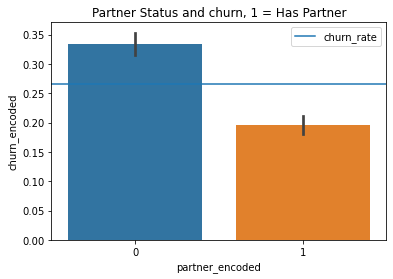

In [39]:
#Looking at relationship between partnered customers and churn

plt.title("Partner Status and churn, 1 = Has Partner")
sns.barplot(x="partner_encoded", y="churn_encoded", data=train_telco)
churn_rate = train_telco.churn_encoded.mean()
plt.axhline(churn_rate, label="churn_rate")
plt.legend()
plt.show()

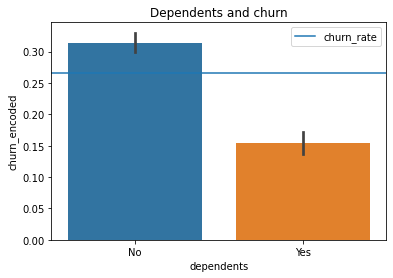

In [25]:
#Looking at relationship between dependents and churn

plt.title("Dependents and churn")
sns.barplot(x="dependents", y="churn_encoded", data=train_telco)
churn_rate = train_telco.churn_encoded.mean()
plt.axhline(churn_rate, label="churn_rate")
plt.legend()
plt.show()

### Running tests to compare these possible relationships
### 1. Gender_Encoded (female ==1) vs. Churn:

Hypotheses:

H^0: The churn rate of women is less than or equal to the chrn rate of men.

H^a: The churn rate of women is greater than the churn rate of men

In [35]:
# Chi-Square test to compare two categorical variables (Gender and Churn)

alpha = 0.05
null_hypothesis = "The churn rate of women is less than or equal to the chrn rate of men."
alternative_hypothesis = "The churn rate of women is greater than the churn rate of men."

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train_telco.churn_encoded, train_telco['gender_encoded'])

chi2, p, degf, expected = stats.chi2_contingency(observed)
p

0.09532066099530129

In [37]:
if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

Fail to reject the null
Insufficient evidence to reject the null


### Conclusion for gender: not significant

### Running tests to compare these possible relationships
### 1. Partner_encoded (has partner ==1) vs. Churn:

Hypotheses:

H^0: The churn rate of partnered customers is greater than or equal to the churn rate of single customers.

H^a: The churn rate of partnered customers is less than the churn rate of single customers.

In [42]:
# Chi-Square test to compare two categorical variables (Partner and Churn)

alpha = 0.05
null_hypothesis = "The churn rate of partnered customers is greater than or equal to the churn rate of single customers."
alternative_hypothesis = "The churn rate of partnered customers is less than the churn rate of single customers."

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train_telco.churn_encoded, train_telco['partner_encoded'])

chi2, p, degf, expected = stats.chi2_contingency(observed)
p

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

Reject the null hypothesis that The churn rate of partnered customers is greater than or equal to the churn rate of single customers.
Sufficient evidence to move forward understanding that The churn rate of partnered customers is less than the churn rate of single customers.
